In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm


from dataset import patch_dataset
from dataset import patch_dataset_test
from trainer import train
from models import basic_FCN, UNet
import segmentation_models_pytorch as smp
import torch.nn.functional as F
from padding import pad_to_size, remove_padding

/opt/miniconda3/envs/MMD_flow/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
file_path_X = 'X_train'
file_path_Y = 'Y_train'
index = np.load('X_train/_index_good.npy')

dataset = patch_dataset(file_path_X, file_path_Y,index,load_in_ram=True, numtype=torch.float32)

In [4]:
batch_size = 64

def custom_collate(batch, mode='test'):
    padded_batch = []
    if mode == 'train':
        for image, mask in batch:
        #     print(image.shape)
        #     print(mask.shape)
        #     print(mask.unsqueeze(0).shape)
            image = pad_to_size(image, target_height=160, target_width=288)
            mask = pad_to_size(mask, target_height=160, target_width=288).squeeze(0)
            padded_batch.append((image, mask))
    
        images, masks = zip(*padded_batch)
        return torch.stack(images), torch.stack(masks)
    
    if mode == 'test':
        for image in batch:
            image = pad_to_size(image, target_height=160, target_width=288)
            padded_batch.append(image)
        return torch.stack(padded_batch)

# dataloader = DataLoader(dataset, batch_size, shuffle=True, collate_fn=custom_collate)
dataloader = DataLoader(dataset, batch_size, shuffle=True)

In [7]:
# model = UNet(in_channels=1, out_channels=3, features=[32, 64, 128, 256])
model = basic_FCN(input_channels=1)
model.to('mps')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = criterion = torch.nn.CrossEntropyLoss()

In [ ]:
x, y = next(iter(dataloader))
x = x.to('mps')
#y = y.to('mps')
model(x).shape

In [ ]:
model = smp.DeepLabV3(
    encoder_name="efficientnet-b0",       
    encoder_weights="imagenet",    
    in_channels=1,                 
    classes=3,           
)
# model = smp.Unet(
#     encoder_name="resnet34",       
#     encoder_weights="imagenet",    
#     in_channels=1,                 
#     classes=3,           
# )

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = criterion = torch.nn.CrossEntropyLoss()

model.to('mps')


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [12]:
train(model, optimizer, loss_fn, dataloader, device='mps', epochs=40)

100%|██████████| 54/54 [00:57<00:00,  1.07s/it]


Epoch 1/40, Train Loss: 0.1297


100%|██████████| 54/54 [00:55<00:00,  1.04s/it]


Epoch 2/40, Train Loss: 0.1296


100%|██████████| 54/54 [00:55<00:00,  1.04s/it]


Epoch 3/40, Train Loss: 0.1292


100%|██████████| 54/54 [01:11<00:00,  1.32s/it]


Epoch 4/40, Train Loss: 0.1289


100%|██████████| 54/54 [01:02<00:00,  1.15s/it]


Epoch 5/40, Train Loss: 0.1245


100%|██████████| 54/54 [01:00<00:00,  1.11s/it]


Epoch 6/40, Train Loss: 0.1232


100%|██████████| 54/54 [01:00<00:00,  1.12s/it]


Epoch 7/40, Train Loss: 0.1211


100%|██████████| 54/54 [00:58<00:00,  1.08s/it]


Epoch 8/40, Train Loss: 0.1207


100%|██████████| 54/54 [01:01<00:00,  1.14s/it]


Epoch 9/40, Train Loss: 0.1185


100%|██████████| 54/54 [00:59<00:00,  1.11s/it]


Epoch 10/40, Train Loss: 0.1202


100%|██████████| 54/54 [00:58<00:00,  1.09s/it]


Epoch 11/40, Train Loss: 0.1170


100%|██████████| 54/54 [00:58<00:00,  1.08s/it]


Epoch 12/40, Train Loss: 0.1184


100%|██████████| 54/54 [00:58<00:00,  1.09s/it]


Epoch 13/40, Train Loss: 0.1167


100%|██████████| 54/54 [00:57<00:00,  1.07s/it]


Epoch 14/40, Train Loss: 0.1148


100%|██████████| 54/54 [00:57<00:00,  1.07s/it]


Epoch 15/40, Train Loss: 0.1148


100%|██████████| 54/54 [00:57<00:00,  1.07s/it]


Epoch 16/40, Train Loss: 0.1135


100%|██████████| 54/54 [00:55<00:00,  1.04s/it]


Epoch 17/40, Train Loss: 0.1127


100%|██████████| 54/54 [00:56<00:00,  1.04s/it]


Epoch 18/40, Train Loss: 0.1114


100%|██████████| 54/54 [00:56<00:00,  1.05s/it]


Epoch 19/40, Train Loss: 0.1123


100%|██████████| 54/54 [00:57<00:00,  1.07s/it]


Epoch 20/40, Train Loss: 0.1124


100%|██████████| 54/54 [01:00<00:00,  1.13s/it]


Epoch 21/40, Train Loss: 0.1110


100%|██████████| 54/54 [01:01<00:00,  1.15s/it]


Epoch 22/40, Train Loss: 0.1123


100%|██████████| 54/54 [00:59<00:00,  1.11s/it]


Epoch 23/40, Train Loss: 0.1093


100%|██████████| 54/54 [00:58<00:00,  1.08s/it]


Epoch 24/40, Train Loss: 0.1102


100%|██████████| 54/54 [01:06<00:00,  1.23s/it]


Epoch 25/40, Train Loss: 0.1086


100%|██████████| 54/54 [01:02<00:00,  1.15s/it]


Epoch 26/40, Train Loss: 0.1088


100%|██████████| 54/54 [01:00<00:00,  1.12s/it]


Epoch 27/40, Train Loss: 0.1091


100%|██████████| 54/54 [00:59<00:00,  1.10s/it]


Epoch 28/40, Train Loss: 0.1092


100%|██████████| 54/54 [01:01<00:00,  1.13s/it]


Epoch 29/40, Train Loss: 0.1080


100%|██████████| 54/54 [01:04<00:00,  1.19s/it]


Epoch 30/40, Train Loss: 0.1065


100%|██████████| 54/54 [01:02<00:00,  1.16s/it]


Epoch 31/40, Train Loss: 0.1061


100%|██████████| 54/54 [00:58<00:00,  1.07s/it]


Epoch 32/40, Train Loss: 0.1067


100%|██████████| 54/54 [00:57<00:00,  1.06s/it]


Epoch 33/40, Train Loss: 0.1066


100%|██████████| 54/54 [00:57<00:00,  1.07s/it]


Epoch 34/40, Train Loss: 0.1049


100%|██████████| 54/54 [00:58<00:00,  1.08s/it]


Epoch 35/40, Train Loss: 0.1065


100%|██████████| 54/54 [00:57<00:00,  1.07s/it]


Epoch 36/40, Train Loss: 0.1068


100%|██████████| 54/54 [00:58<00:00,  1.08s/it]


Epoch 37/40, Train Loss: 0.1043


100%|██████████| 54/54 [01:00<00:00,  1.12s/it]


Epoch 38/40, Train Loss: 0.1036


100%|██████████| 54/54 [00:59<00:00,  1.09s/it]


Epoch 39/40, Train Loss: 0.1039


100%|██████████| 54/54 [00:57<00:00,  1.07s/it]

Epoch 40/40, Train Loss: 0.1042


In [ ]:
torch.save(model.state_dict(), 'models/pretrained-deeplabv3-50e-default-resnet-imagenet.pth')

In [20]:
model = smp.DeepLabV3(
    encoder_name="resnet34",       
    encoder_weights="imagenet",    
    in_channels=1,                 
    classes=3,           
)
model.load_state_dict(torch.load('models/pretrained-deeplabv3-30e-default-resnet-imagenet.pth'))
model.to('mps')

/var/folders/01/vg1fbv651zv1_lyldms2k9ch0000gn/T/ipykernel_5142/1941778246.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('models/pretr

DeepLabV3(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

  0%|          | 0/54 [00:00<?, ?it/s]

torch.Size([160, 272])
torch.Size([64, 3, 160, 272])


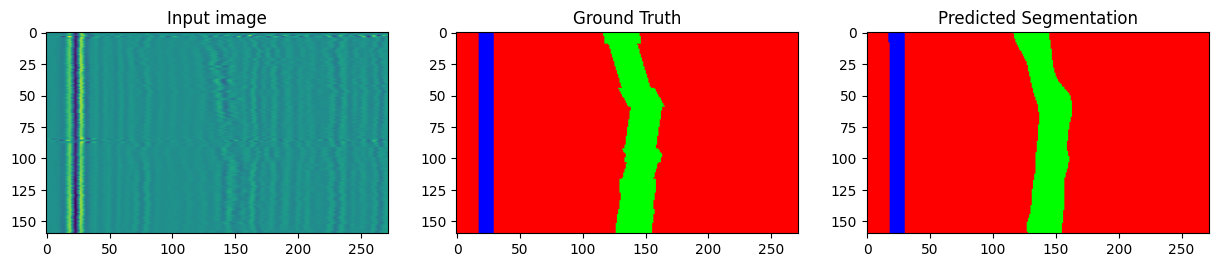

  0%|          | 0/54 [00:05<?, ?it/s]


In [23]:
for x,y in tqdm(dataloader):
    x = x.to('mps')
    y = y.to('mps')
    logits = model(x)[0]
    pred = torch.argmax(logits, dim=0)
    # pred = remove_padding(torch.argmax(logits, dim=0))
    print(pred.shape)
    print(y.shape)
    #print(y[0, 20, 25, :])

    pred = pred.cpu().detach().numpy()
    # Define RGB colors for each class
    colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])  # Red, Green, Blue

    # Convert class indices to RGB colors
    segmentation_mask = colors[pred]  # Shape: (H, W, 3)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(x[0].permute(1, 2, 0).cpu().detach().numpy())
    
    axs[0].set_title('Input image')

    axs[1].imshow(y[0].permute(1, 2, 0).cpu().detach().numpy())
    axs[1].set_title('Ground Truth')

    axs[2].imshow(segmentation_mask)
    axs[2].set_title('Predicted Segmentation')

    plt.show()

    

    break

In [14]:
file_path_X = 'X_test'
index = np.load('X_test/_index.npy')

dataset_test = patch_dataset_test(file_path_X,index,load_in_ram=True, numtype=torch.float32)

# test_loader = DataLoader(dataset_test, batch_size, shuffle=False, collate_fn=custom_collate)

test_loader = DataLoader(dataset_test, batch_size, shuffle=False)

  0%|          | 0/16 [00:00<?, ?it/s]

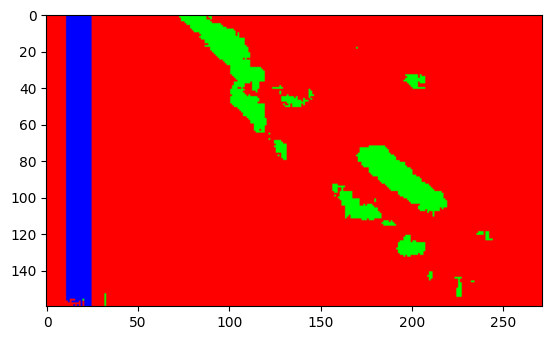

  0%|          | 0/16 [00:01<?, ?it/s]


In [15]:
model.to("mps")

for batch in tqdm(test_loader):
    x = batch
    x = x.to('mps')
    logits = model(x)[0]
    pred = torch.argmax(logits, dim=0)
    # pred = remove_padding(pred)
    pred = pred.cpu().detach().numpy()
    colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])  # Red, Green, Blue
    segmentation_mask = colors[pred]  # Shape: (H, W, 3)
    plt.imshow(segmentation_mask)
    plt.show()
    break

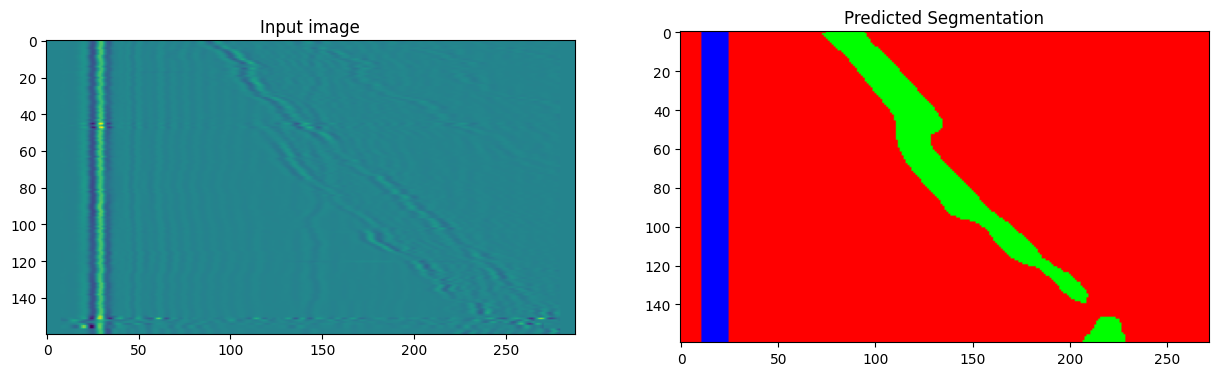

In [16]:
model = smp.Unet(
    encoder_name="resnet34",       
    encoder_weights="imagenet",    
    in_channels=1,                 
    classes=3,           
)

model.load_state_dict(torch.load('models/pretrained-resnet34-imagenet.pth', weights_only=True))

model.to('mps')
model.eval()

for x in dataset_test:
    x = pad_to_size(x, target_height=160, target_width=288)
    x = x.to('mps')
    x.unsqueeze_(0)
    logits = model(x)[0]
    pred = torch.argmax(logits, dim=0)
    pred = remove_padding(pred)
    
    pred = pred.cpu().detach().numpy()
    # Define RGB colors for each class
    colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])  # Red, Green, Blue

    # Convert class indices to RGB colors
    segmentation_mask = colors[pred]  # Shape: (H, W, 3)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(x[0].permute(1, 2, 0).cpu().detach().numpy())
    
    axs[0].set_title('Input image')


    axs[1].imshow(segmentation_mask)
    axs[1].set_title('Predicted Segmentation')

    plt.show()

    break

In [ ]:
import os

model.eval()
predictions = []

os.makedirs('predictions', exist_ok=True)

with torch.no_grad():
    for i in range(len(dataset_test)):
        x = torch.from_numpy(np.load(file_path_X+'/'+index[i])).unsqueeze(0).to(torch.float32)
        # x = pad_to_size(x, target_height=160, target_width=288)
        x = x.to('mps')
        logits = model(x.unsqueeze(0))[0]
        pred = torch.argmax(logits, dim=0)
        # pred = remove_padding(pred)
        pred = pred.cpu().detach().numpy()
        # pred_custom = custom_output(logits,10)
        # pred_custom = pred_custom.cpu().detach()
        # pred_custom = pred_custom.numpy()
        predictions.append(pred)
        
        # Save the prediction
        filename = os.path.basename(index[i])
        np.save(f'predictions/{filename}', pred)

predictions = np.array(predictions)
print(predictions.shape)  # Should print (num_images, 160, 272)

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

size_labels = 272
predictions = {'test':{}}
for phase in predictions.keys():
    img_save_dir = Path('predictions')
    for img_path in img_save_dir.glob('*.npy'):
        name = img_path.stem
        if name in predictions[phase]:
            continue
        prediction = np.load(img_path)
        if prediction.shape[1]!=size_labels:
            prediction_aux = -1+np.zeros(160*size_labels) # Adding padding to ensure all masks have the same size
            prediction_aux[0:160*160] = prediction.flatten()
        else:
            prediction_aux = prediction.flatten()
        predictions[phase].update({name:prediction_aux})
pd.DataFrame(predictions['test'], dtype='int').T.to_csv(Path(f'submits/pretrained-deeplabv3-30e-default-resnet34-imagenet.csv'))